In [74]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import os
import requests 

import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np
import re

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [3]:
regularTotSeason = pd.read_csv('Data/CSV Files/Database/first82TotSeasons.csv')
playoffTotSeason = pd.read_csv('Data/CSV Files/Database/playoffTotSeasons.csv')

regularAVGSeason = pd.read_csv('Data/CSV Files/Database/first82AVGSeasons.csv')
playoffAVGSeason = pd.read_csv('Data/CSV Files/Database/playoffAVGSeasons.csv')

careerTotPlayer = pd.read_csv('Data/CSV Files/Database/CareerTotPlayer.csv')
careerAVGPlayer = pd.read_csv('Data/CSV Files/Database/CareerAVGPlayer.csv')
moreInfoPlayer = pd.read_csv('Data/CSV Files/Database/MoreInfoPerPlayer.csv')

singlePlayerAward = pd.read_csv('Data/CSV Files/Awards/singlePlayerAwards.csv')
allNBATeam = pd.read_csv('Data/CSV Files/Awards/AllNBATeam.csv')
nbaAllStar = pd.read_csv('Data/CSV Files/Awards/NBAAllStar.csv')
nbaDefence = pd.read_csv('Data/CSV Files/Awards/NBAAllDefenceNum.csv')

In [42]:
moreInfoPlayerCopy = pd.concat([moreInfoPlayer['ID'], moreInfoPlayer['Ht(cm)'], moreInfoPlayer['Wt(kg)']])
moreInfoPlayerCopy

0       greenac01
1       bramlaj01
2       engliaj01
3       guytoaj01
4       hammoaj01
5       priceaj01
6       wyndeaj01
7       brookaa01
8       gordoaa01
9        grayaa01
10      harriaa01
11      holidaa01
12      jacksaa01
13      mckieaa01
14      milesaa01
15      swinsaa01
16      williaa01
17      naderab01
18       earlac01
19        lawac01
20      harriad01
21      keefead01
22      morriad01
23      foylead01
24      jordaad01
25      thomaad01
26      paynead01
27      brancad01
28      caldwad01
29      griffad01
          ...    
2825            0
2826            0
2827            0
2828            0
2829            0
2830            0
2831            0
2832            0
2833            0
2834            0
2835            0
2836            0
2837            0
2838            0
2839            0
2840            0
2841            0
2842            0
2843            0
2844            0
2845            0
2846            0
2847            0
2848            0
2849      

In [8]:
regularTotSeason.columns

Index(['ID', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [6]:
seasonsList = regularTotSeason.drop_duplicates(subset='Year', keep='first')
seasonsList = seasonsList.iloc[:, 1].tolist()
seasonsList = np.array(seasonsList, dtype=pd.Series)
print(seasonsList)

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [17]:
newCol = ['Year', 'Age', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']

In [28]:
seasonsAVG = pd.DataFrame()
for year in range(0, len(seasonsList)):
    stats = []
#     Year Number
    currSeason = seasonsList[year]
    stats.append(currSeason)
#     Current Season & Playoff
    currRegular = regularTotSeason[regularTotSeason['Year'] == currSeason]
    currPlayoff = playoffTotSeason[playoffTotSeason['Year'] == currSeason]
#     Avarage Age
    currMeanAge = round(currRegular.describe()['Age'][1], 2)
    stats.append(currMeanAge)
#     Total Games
    totalPerYear = currRegular['G'].sum() + currPlayoff['G'].sum()
#     Adding stats
    for x in range(2, len(newCol)):
#         newStats
        stats.append(round((currRegular[newCol[x]].sum() + currPlayoff[newCol[x]].sum()) / totalPerYear, 1))
    stats = pd.DataFrame(stats)
    stats = pd.DataFrame(stats.transpose())
    stats.columns = newCol
    stats['FG%'] = (stats['FG'] / stats['FGA']) * 100
    stats['3P%'] = (stats['3P'] / stats['3PA']) * 100
    stats['2P%'] = (stats['2P'] / stats['2PA']) * 100
    stats['eFG%'] = ((stats['FG'] + 0.5 * stats['3P']) / stats['FGA']) * 100
    stats['FT%'] = (stats['FT'] / stats['FTA']) * 100
    seasonsAVG = pd.concat([seasonsAVG,stats])
seasonsAVG.tail()

,Year,Age,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2015.0,26.54,3.6,7.9,45.569620,0.7,2.1,33.333333,2.8,5.8,...,72.727273,1.0,3.1,4.1,2.1,0.7,0.5,1.3,1.9,9.5
0,2016.0,26.59,3.6,7.9,45.569620,0.8,2.3,34.782609,2.8,5.7,...,77.272727,1.0,3.1,4.1,2.1,0.7,0.5,1.3,1.9,9.6
0,2017.0,26.41,3.7,8.0,46.250000,0.9,2.5,36.000000,2.8,5.5,...,77.272727,0.9,3.1,4.1,2.1,0.7,0.4,1.3,1.9,9.9
0,2018.0,26.09,3.7,8.1,45.679012,1.0,2.7,37.037037,2.7,5.4,...,80.000000,0.9,3.2,4.1,2.2,0.7,0.5,1.3,1.9,10.0
0,2019.0,25.90,3.9,8.4,46.428571,1.1,3.0,36.666667,2.8,5.4,...,77.272727,1.0,3.3,4.3,2.3,0.7,0.5,1.3,2.0,10.5


In [29]:
seasonsTotal = pd.DataFrame()
for year in range(0, len(seasonsList)):
    stats = []
#     Year Number
    currSeason = seasonsList[year]
    stats.append(currSeason)
#     Current Season & Playoff
    currRegular = regularTotSeason[regularTotSeason['Year'] == currSeason]
    currPlayoff = playoffTotSeason[playoffTotSeason['Year'] == currSeason]
#     Avarage Age
    currMeanAge = round(currRegular.describe()['Age'][1], 2)
    stats.append(currMeanAge)
#     Total Games
    totalPerYear = currRegular['G'].sum() + currPlayoff['G'].sum()
#     Adding stats
    for x in range(2, len(newCol)):
#         newStats
        stats.append(round(currRegular[newCol[x]].sum() + currPlayoff[newCol[x]].sum(), 1))
    stats = pd.DataFrame(stats)
    stats = pd.DataFrame(stats.transpose())
    stats.columns = newCol
    stats['FG%'] = (stats['FG'] / stats['FGA']) * 100
    stats['3P%'] = (stats['3P'] / stats['3PA']) * 100
    stats['2P%'] = (stats['2P'] / stats['2PA']) * 100
    stats['eFG%'] = ((stats['FG'] + 0.5 * stats['3P']) / stats['FGA']) * 100
    stats['FT%'] = (stats['FT'] / stats['FTA']) * 100
    seasonsTotal = pd.concat([seasonsTotal,stats])
seasonsTotal.head()

,Year,Age,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980.0,26.12,82715.0,171976.0,48.096827,1493.0,5355.0,27.880486,81222.0,166621.0,...,76.414253,28565.0,56719.0,85284.0,49012.0,17836.0,10092.0,35228.0,46289.0,207217.0
0,1981.0,25.91,85227.0,175714.0,48.503250,986.0,4042.0,24.393864,84241.0,171672.0,...,75.028302,28950.0,57568.0,86518.0,50485.0,17831.0,10644.0,36501.0,49843.0,214519.0
0,1982.0,26.03,85677.0,174761.0,49.025240,1180.0,4521.0,26.100420,84497.0,170240.0,...,74.549988,28509.0,57637.0,86146.0,49881.0,16882.0,10746.0,34463.0,51814.0,214695.0
0,1983.0,26.05,85814.0,176861.0,48.520590,1069.0,4478.0,23.872264,84745.0,172383.0,...,74.035403,29242.0,58493.0,87735.0,51193.0,17462.0,11083.0,36963.0,50481.0,213894.0
0,1984.0,26.12,88561.0,180243.0,49.134224,1274.0,5036.0,25.297855,87287.0,175207.0,...,76.021816,29002.0,58875.0,87877.0,53239.0,17265.0,10814.0,35809.0,52788.0,224672.0


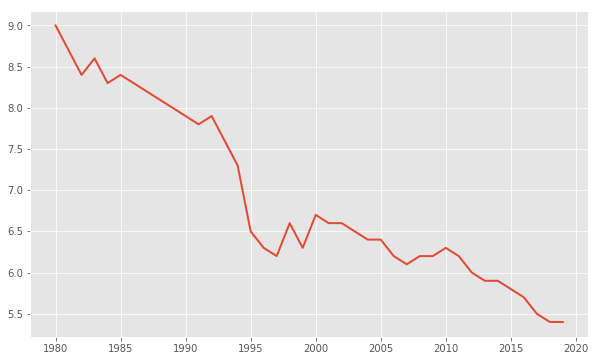

In [35]:
plt.plot(seasonsAVG['Year'], seasonsAVG['2PA'], linewidth=2.0);

In [75]:
seasonsTotal

,Year,Age,Ht(cm),Wt(kg),FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1981.0,22.91,198.815158,199.652632,11101.0,23868.0,46.509972,81.0,459.0,17.647059,...,70.708796,4268.0,7545.0,11813.0,6399.0,2470.0,1418.0,5287.0,7858.0,27251.0
0,1982.0,23.11,199.559873,204.019108,24066.0,48970.0,49.144374,286.0,1157.0,24.719101,...,71.412052,8622.0,16601.0,25223.0,12805.0,4724.0,3182.0,10216.0,16596.0,59534.0
0,1983.0,23.50,199.879415,204.834146,35795.0,73758.0,48.530329,485.0,2003.0,24.213679,...,71.678902,12780.0,23897.0,36677.0,21008.0,7600.0,4828.0,15832.0,22649.0,88478.0
0,1984.0,23.91,200.189630,206.607407,42729.0,87181.0,49.011826,622.0,2496.0,24.919872,...,74.253319,14910.0,28539.0,43449.0,25173.0,8606.0,5798.0,17872.0,27458.0,107560.0
0,1985.0,24.32,200.335576,207.694704,51788.0,105317.0,49.173448,995.0,3603.0,27.615876,...,74.729768,17988.0,35312.0,53300.0,30499.0,10696.0,6812.0,21529.0,31358.0,130704.0
0,1986.0,24.79,201.194737,209.686981,57237.0,116934.0,48.948125,1098.0,4055.0,27.077682,...,73.761472,20010.0,39926.0,59936.0,32760.0,12055.0,7668.0,23480.0,35118.0,145067.0
0,1987.0,25.08,200.997002,208.840295,66002.0,137339.0,48.057726,2229.0,7379.0,30.207345,...,75.307631,23318.0,45475.0,68793.0,38717.0,13539.0,8903.0,26003.0,39126.0,170096.0
0,1988.0,25.51,200.588451,208.105634,68912.0,143417.0,48.050092,2618.0,8360.0,31.315789,...,75.931244,23861.0,47996.0,71857.0,41752.0,14068.0,9093.0,26843.0,39900.0,176665.0
0,1989.0,25.70,200.565721,208.626638,79938.0,167275.0,47.788372,4184.0,12902.0,32.429081,...,76.345744,27714.0,55640.0,83354.0,47470.0,17388.0,10188.0,31805.0,44886.0,205644.0
0,1990.0,26.01,200.344379,209.473373,87831.0,184087.0,47.711680,4724.0,14218.0,33.225489,...,75.892857,29611.0,62481.0,92092.0,51818.0,18366.0,10993.0,33047.0,49957.0,226541.0


In [16]:
print(season1980['FG'].sum() + playoff1980['FG'].sum())

82715
